In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

df_train = pd.read_excel('Untitled Folder/train.xlsx', sheet_name='Sheet1')
print(df_train.info()) # (811,7)

#Load Test dataset
df_test = pd.read_excel('Untitled Folder/test.xlsx', sheet_name='Sheet1') # (150,7) 

# Drop rows with 2 or more columns missing, as there are few features it may be hard
# to predict more than one missing value accurately in a cloumn.
df_train.dropna(thresh=5,inplace=True) # (807, 7)
df_test.dropna(thresh=5,inplace=True)

#Mapping categorical text features to numeric called encoding
shape_mapping = {'round=':1,'oval':2,'lobular':3,'irregular':4}
margin_mapping = {'circumscribed':1, 'microlobulated':2, 'obscured':3, 'ill-defined':4, 'spiculated':5}
density_mapping = {'high':1, 'iso':2, 'low':3, 'fat-containing':4}  

df_train['Shape'] = df_train['Shape'].map(shape_mapping)
df_train['Margin'] = df_train['Margin'].map(margin_mapping)
df_train['Mass_Density'] = df_train['Mass_Density'].map(density_mapping)

df_test['Shape'] = df_test['Shape'].map(shape_mapping)
df_test['Margin'] = df_test['Margin'].map(margin_mapping)
df_test['Mass_Density'] = df_test['Mass_Density'].map(density_mapping)

df_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         811 non-null    int64  
 1   BI_RADS       809 non-null    float64
 2   Age           723 non-null    float64
 3   Shape         781 non-null    object 
 4   Margin        764 non-null    object 
 5   Mass_Density  735 non-null    object 
 6   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB
None


,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,3.0,5.0,3.0,1
1,2,4.0,43.0,NaN,1.0,NaN,1
2,3,5.0,58.0,4.0,5.0,3.0,1
3,4,4.0,28.0,NaN,1.0,3.0,0
4,5,5.0,74.0,NaN,5.0,NaN,1


# Univariate Analysis


count    722.000000
mean      55.873961
std       16.894120
min        5.000000
25%       45.000000
50%       56.000000
75%       66.000000
max      130.000000
Name: Age, dtype: float64


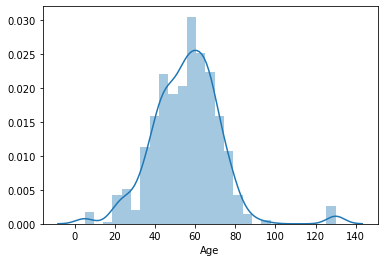

In [2]:
# Univariate Analysis of  Age
print(df_train.Age.describe())
# Age Histogram
sns.distplot(df_train['Age'])

# Age: Max value is 130 which seems to be an outlier. 5 is the min age. Age looks to be normally distributed.


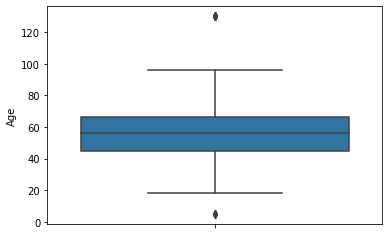

In [3]:
# Age Box-Plot
sns.boxplot( y=df_train["Age"] );

col_0    count
BI_RADS       
0.0          3
2.0         13
3.0         34
4.0        437
5.0        310
6.0          8
55.0         1


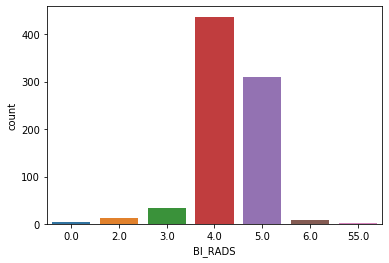

In [4]:
# Univariate Analysis of BI_RADS categorical variable
# frequency tables (also known as crosstabs) 
freqtable_BIRADS = pd.crosstab(index = df_train['BI_RADS'],  # Make a crosstab
                              columns="count")      # Name the count column
print(freqtable_BIRADS)

# barchart for visualaization of categorical variable
sns.countplot(df_train['BI_RADS']) 

#BI_RADS: 7 diecrete values, 55 is having only one value, could be data entry issue or a possible outlier

col_0  count
Shape       
2.0      175
3.0       72
4.0      340


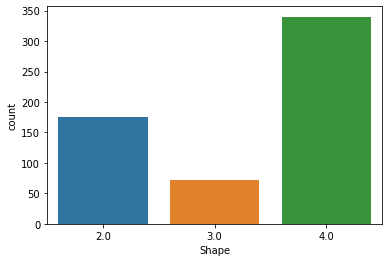

In [5]:
# Univariate Analysis of Shape categorical variable
# frequency tables (also known as crosstabs) 
freqtable_Shape = pd.crosstab(index = df_train['Shape'],  # Make a crosstab
                              columns="count")      # Name the count column
print(freqtable_Shape)

# barchart for visualaization of categorical variable
sns.countplot(df_train['Shape']) 

#Shape: 3 discrete values 

col_0   count
Margin       
1.0       298
2.0        17
3.0        97
4.0       236
5.0       116


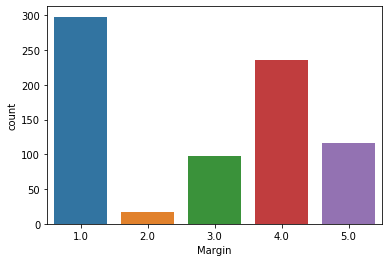

In [6]:
# Univariate Analysis of Margin categorical variable
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# frequency tables (also known as crosstabs) 
freqtable_Margin = pd.crosstab(index = df_train['Margin'],  # Make a crosstab
                              columns="count")      # Name the count column
print(freqtable_Margin)

# barchart for visualaization of categorical variable
sns.countplot(df_train['Margin']) 

#Margin: 5 discrete values 

col_0         count
Mass_Density       
1.0              12
2.0              49
3.0             662
4.0              10


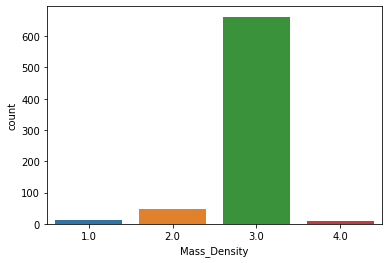

In [7]:
# Univariate Analysis of Mass_Density categorical variable
# frequency tables (also known as crosstabs) 
freqtable_Mass_Density = pd.crosstab(index = df_train['Mass_Density'],  # Make a crosstab
                              columns="count")      # Name the count column
print(freqtable_Mass_Density)

# barchart for visualaization of categorical variable
sns.countplot(df_train['Mass_Density']) 

#Mass_Density: 4 discrete values 

# BI-variate Analysis between two categorical variables predictor vs target

Severity    0    1
BI_RADS           
0.0         1    2
2.0        12    1
3.0        29    5
4.0       351   86
5.0        38  272
6.0         3    5
55.0        0    1


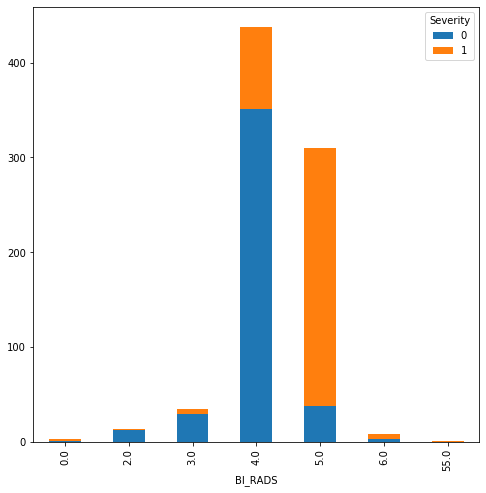

In [8]:
#BI-variate Analysis between two categorical variables BI_RADS and target Severity

#two-way table
BIRads_Severity = pd.crosstab(index=df_train["BI_RADS"], 
                              columns=df_train["Severity"])
print(BIRads_Severity)

#Stacked Column Chart for visualaization
BIRads_Severity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent

In [9]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(BIRads_Severity)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')

#Measures used to analyze the power/strength of relationship between two cetagorical varables are:
# 1)Cramer’s V for Nominal Categorical Variable
# 2)Mantel-Haenszed Chi-Square for ordinal categorical variable.


dof=6
probability=0.950, critical=12.592, stat=362.790
Dependent (reject H0)


Severity    0    1
Shape             
2.0       144   31
3.0        41   31
4.0        74  266


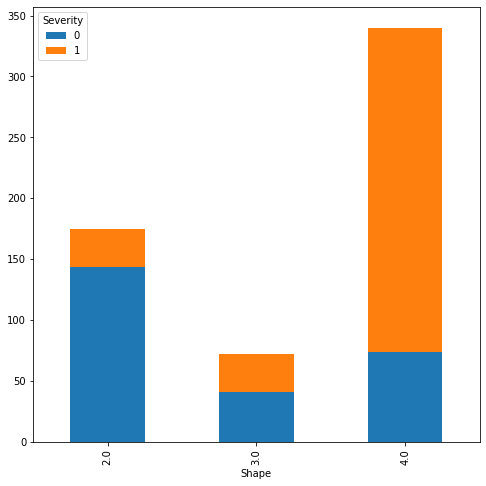

In [10]:
#BI-variate Analysis between two categorical variables Shape and target Severity

#two-way table
Shape_Severity = pd.crosstab(index=df_train["Shape"], 
                              columns=df_train["Severity"])
print(Shape_Severity)

#Stacked Column Chart for visualaization
Shape_Severity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [11]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(Shape_Severity)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')
#Measures used to analyze the power/strength of relationship between two cetagorical varables are:
# 1)Cramer’s V for Nominal Categorical Variable
# 2)Mantel-Haenszed Chi-Square for ordinal categorical variable.


dof=2
probability=0.950, critical=5.991, stat=177.115
Dependent (reject H0)


Severity    0    1
Margin            
1.0       263   35
2.0         7   10
3.0        37   60
4.0        78  158
5.0        17   99


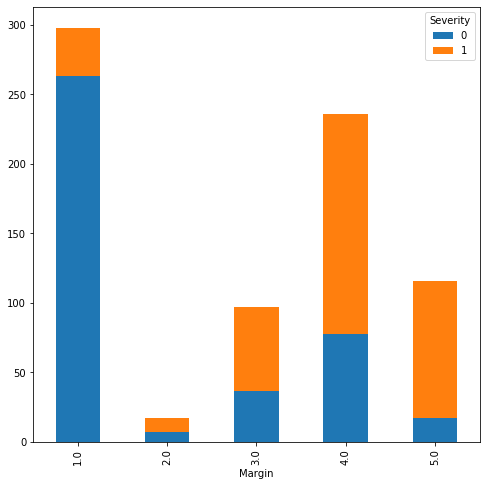

In [12]:
#BI-variate Analysis between two categorical variables Shape and target Severity

#two-way table
Margin_Severity = pd.crosstab(index=df_train["Margin"], 
                              columns=df_train["Severity"])
print(Margin_Severity)

#Stacked Column Chart for visualaization
Margin_Severity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [13]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(Margin_Severity)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')
#Measures used to analyze the power/strength of relationship between two cetagorical varables are:
# 1)Cramer’s V for Nominal Categorical Variable
# 2)Mantel-Haenszed Chi-Square for ordinal categorical variable.


dof=4
probability=0.950, critical=9.488, stat=264.140
Dependent (reject H0)


Severity        0    1
Mass_Density          
1.0             8    4
2.0            35   14
3.0           333  329
4.0             7    3


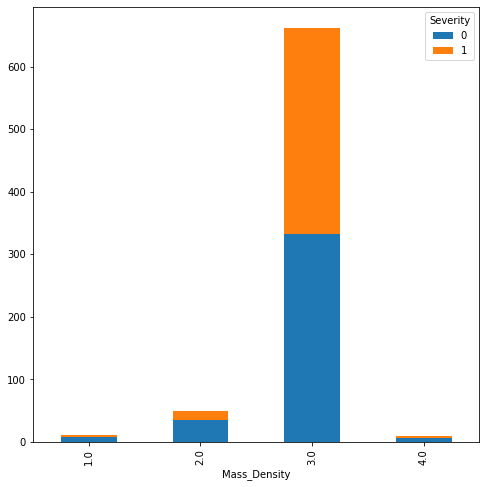

In [14]:
#BI-variate Analysis between two categorical variables Shape and target Severity

#two-way table
MassDensity_Severity = pd.crosstab(index=df_train["Mass_Density"], 
                              columns=df_train["Severity"])
print(MassDensity_Severity)

#Stacked Column Chart for visualaization
MassDensity_Severity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [15]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(MassDensity_Severity)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')
#Measures used to analyze the power/strength of relationship between two cetagorical varables are:
# 1)Cramer’s V for Nominal Categorical Variable
# 2)Mantel-Haenszed Chi-Square for ordinal categorical variable.


dof=3
probability=0.950, critical=7.815, stat=10.493
Dependent (reject H0)


# Handling Outliers

In [16]:
df_train.Age.describe()

count    722.000000
mean      55.873961
std       16.894120
min        5.000000
25%       45.000000
50%       56.000000
75%       66.000000
max      130.000000
Name: Age, dtype: float64

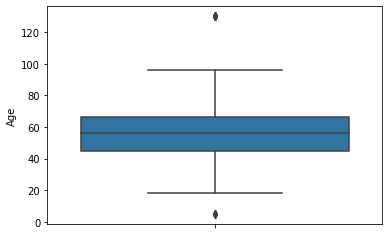

In [17]:
sns.boxplot(x=df_train.Age, orient="v")
# Age 130 is an outlier, rarely at age 5 cancer can occur, so assuming these two are outliers we 
#will handle outliers before binning and converting Age to categorical value.

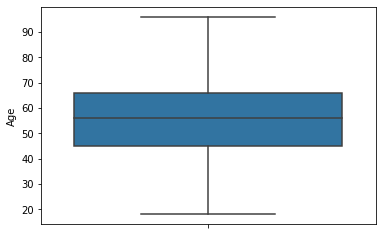

In [18]:
q3 = df_train.Age.quantile(.75)
q1 = df_train.Age.quantile(.25)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
#DF without outliers in price
df_train = df_train[~((df_train.Age > upper_bound) | (df_train.Age < lower_bound))]

sns.boxplot(x=df_train.Age, orient="v")
#As you can see below there are no more outliers in Price for train dataset

#Remove Age outliers from test dataset
q3 = df_test.Age.quantile(.75)
q1 = df_test.Age.quantile(.25)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
#DF without outliers in price
df_test = df_test[~((df_test.Age > upper_bound) | (df_test.Age < lower_bound))]


# Feature Engineering

In [19]:
#Binning Age to convert it in to Categorical feature
#add a new AgeBand category column next to the age group. 
category = pd.cut(df_train.Age,bins=[10,25,40,55,70,85,100],labels=[0,1,2,3,4,5])
df_train.insert(6,'AgeBand',category)
df_train.head()

category_test = pd.cut(df_test.Age,bins=[10,25,40,55,70,85,100],labels=[0,1,2,3,4,5])
df_test.insert(6,'AgeBand',category_test)

# BI-variate Analysis

Severity    0    1
AgeBand           
0          21    0
1          74   13
2         148   80
3         118  152
4          20   74
5           0    7


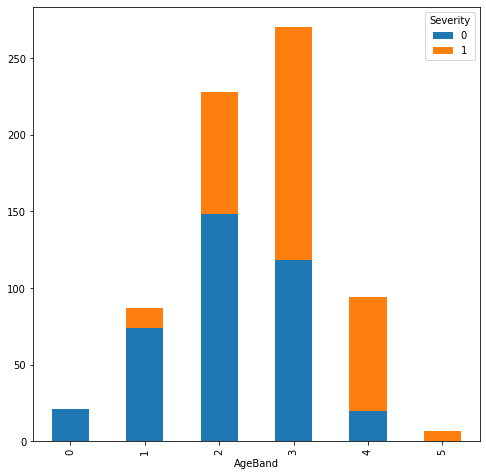

In [20]:
#BI-variate Analysis between two categorical variables AgeBand and target Severity

#two-way table
AgeBand_Severity = pd.crosstab(index=df_train["AgeBand"], 
                              columns=df_train["Severity"])
print(AgeBand_Severity)

#Stacked Column Chart for visualaization
AgeBand_Severity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# Higher aged people are more proned to cancers

In [21]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(AgeBand_Severity)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')
#Measures used to analyze the power/strength of relationship between two cetagorical varables are:
# 1)Cramer’s V for Nominal Categorical Variable
# 2)Mantel-Haenszed Chi-Square for ordinal categorical variable.


dof=5
probability=0.950, critical=11.070, stat=122.818
Dependent (reject H0)


In [22]:
# Convert to Object
df_train['BI_RADS'] = df_train['BI_RADS'].astype(object)
df_train['Shape'] = df_train['Shape'].astype(object)
df_train['Margin'] = df_train['Margin'].astype(object)
df_train['Mass_Density'] = df_train['Mass_Density'].astype(object)
df_train['AgeBand'] = df_train['AgeBand'].astype(object)

df_train.dtypes

df_test['BI_RADS'] = df_test['BI_RADS'].astype(object)
df_test['Shape'] = df_test['Shape'].astype(object)
df_test['Margin'] = df_test['Margin'].astype(object)
df_test['Mass_Density'] = df_test['Mass_Density'].astype(object)
df_test['AgeBand'] = df_test['AgeBand'].astype(object)

# Missing Value Treatment

In [23]:
imputer = KNNImputer()
df_train = pd.DataFrame(np.round(imputer.fit_transform(df_train)),columns = df_train.columns)
df_train.info()

#Impute test set
df_test = pd.DataFrame(np.round(imputer.fit_transform(df_test)),columns = df_test.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         792 non-null    float64
 1   BI_RADS       792 non-null    float64
 2   Age           792 non-null    float64
 3   Shape         792 non-null    float64
 4   Margin        792 non-null    float64
 5   Mass_Density  792 non-null    float64
 6   AgeBand       792 non-null    float64
 7   Severity      792 non-null    float64
dtypes: float64(8)
memory usage: 49.6 KB


Severity  0.0  1.0
BI_RADS           
1.0         4    8
2.0        12    1
3.0        29    5
4.0       347   86
5.0        36  264


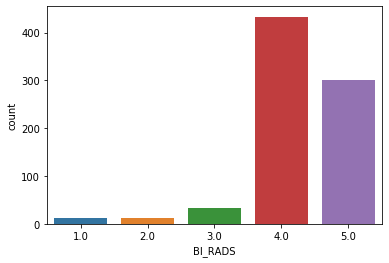

In [24]:
# BI_RADS should be 1 to 5, but here we have 0.0,6.0,55.0 there could be a data collection issue.
#Even though 55 coluld be a possible outlier, I will map all of them to 1.0 as it is missing
# BI_RADS as per the specification should be from 1 to 5 ordinal data so order is important, but we have 0,and 6. So assuming
#data issue #0s can be replaced to 1, and 6 can be repalced by 5.

# But Bi_RADS from (2 to 5) has many rows, so replacing 0,6,55 with 1
df_train.loc[(df_train["BI_RADS"] == 0.0) | (df_train["BI_RADS"] == 6.0) | (df_train["BI_RADS"] == 55.0), 'BI_RADS' ] = 1.0

df_test.loc[(df_test["BI_RADS"] == 0.0) | (df_test["BI_RADS"] == 6.0) | (df_test["BI_RADS"] == 55.0), 'BI_RADS' ] = 1.0

#two-way table
BIRads_Severity = pd.crosstab(index=df_train["BI_RADS"], 
                              columns=df_train["Severity"])
print(BIRads_Severity)
# barchart for visualaization of categorical variable
sns.countplot(df_train['BI_RADS'])

In [25]:
# Age After outlier treatment and imputing missing values
df_train.Age.describe()

count    792.000000
mean      55.337121
std       13.506237
min       18.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       96.000000
Name: Age, dtype: float64

In [26]:
#Percentage of target variables. Although theres a data imbalance, I think its minimal, so ignoring imbalance handling
print(df_train['Severity'].value_counts(normalize=True))
print(df_train.shape)


0.0    0.540404
1.0    0.459596
Name: Severity, dtype: float64
(792, 8)


# BI-variate Analysis between two categorical variables

BI_RADS  1.0  2.0  3.0  4.0  5.0
Shape                           
2.0        1    3   13  160   20
3.0        3    8   13  139   45
4.0        8    2    8  134  235


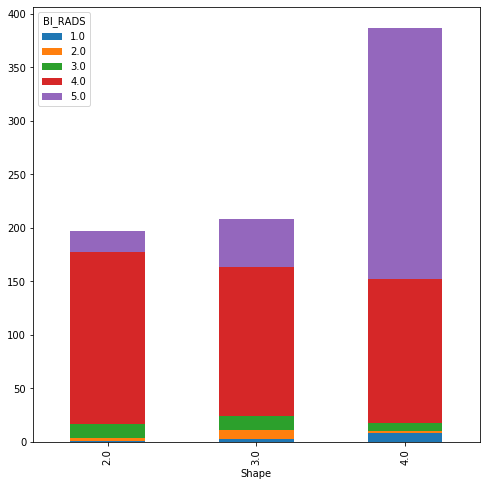

In [27]:
#BI-variate Analysis between two categorical variables BI_RADS and target Severity

#two-way table
Shape_BIRADS = pd.crosstab(index=df_train["Shape"], 
                              columns=df_train["BI_RADS"])
print(Shape_BIRADS)

#Stacked Column Chart for visualaization
Shape_BIRADS.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [28]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(Shape_BIRADS)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')

dof=8
probability=0.950, critical=15.507, stat=187.278
Dependent (reject H0)


BI_RADS  1.0  2.0  3.0  4.0  5.0
Margin                          
1.0        2    8   18  256   11
2.0        0    2    1   13   11
3.0        4    1    6   51   54
4.0        3    2    7   92  134
5.0        3    0    2   21   90


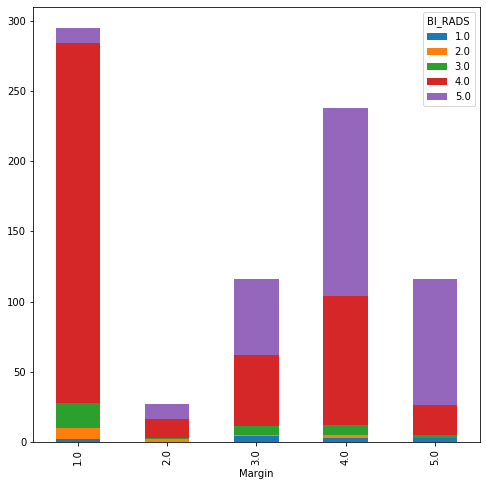

In [29]:
#BI-variate Analysis between two categorical variables BI_RADS and target Severity

#two-way table
Margin_BIRADS = pd.crosstab(index=df_train["Margin"], 
                              columns=df_train["BI_RADS"])
print(Margin_BIRADS)

#Stacked Column Chart for visualaization
Margin_BIRADS.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [30]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(Shape_BIRADS)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')

dof=8
probability=0.950, critical=15.507, stat=187.278
Dependent (reject H0)


BI_RADS       1.0  2.0  3.0  4.0  5.0
Mass_Density                         
1.0             0    1    1    5    5
2.0             0    4    2   32   17
3.0            12    7   30  394  272
4.0             0    1    1    2    6


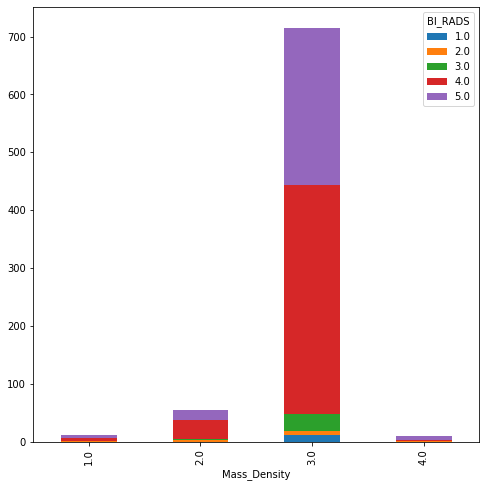

In [31]:
#BI-variate Analysis between two categorical variables BI_RADS and target Severity

#two-way table
MassDensity_BIRADS = pd.crosstab(index=df_train["Mass_Density"], 
                              columns=df_train["BI_RADS"])
print(MassDensity_BIRADS)

#Stacked Column Chart for visualaization
MassDensity_BIRADS.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [32]:
#Chi-Square statistical Test to determine if two categorical variables are independent or dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(MassDensity_BIRADS)
print('dof=%d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
   print('Dependent (reject H0)')
else:
   print('Independent (fail to reject H0)')

dof=12
probability=0.950, critical=21.026, stat=27.412
Dependent (reject H0)


In [33]:
y_train = df_train.Severity
X_train = df_train.drop(['Index','Age','Severity'], axis=1)
X_train.head()

,BI_RADS,Shape,Margin,Mass_Density,AgeBand
0,5.0,3.0,5.0,3.0,3.0
1,4.0,3.0,1.0,3.0,2.0
2,5.0,4.0,5.0,3.0,3.0
3,4.0,3.0,1.0,3.0,1.0
4,5.0,3.0,5.0,3.0,4.0


# Feature selection

Feature 0: 23.150522
Feature 1: 37.056551
Feature 2: 205.825253
Feature 3: 0.200267
Feature 4: 47.908324


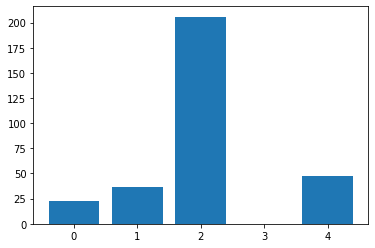

In [34]:
#Feature selection using chisquare for bulding a model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)


# Scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# We can see that Margin,AgeBand,Shape and BI_RADS are 4 most important variables for predicting the target Severity. 
#So we will use these 4 for model building and drop "Mass_Density"

In [35]:
#Dropping 'Mass_Density' as we are not using it for building a predictive model
X_train.drop(['Mass_Density'], axis=1,inplace=True)
print(X_train.columns)

    

Index(['BI_RADS', 'Shape', 'Margin', 'AgeBand'], dtype='object')


In [36]:
y_test_actual = df_test.Severity
X_test = df_test.drop(['Index','Age','Mass_Density','Severity'], axis=1)
X_test.head()

,BI_RADS,Shape,Margin,AgeBand
0,5.0,3.0,4.0,3.0
1,5.0,3.0,2.0,4.0
2,4.0,2.0,1.0,3.0
3,4.0,4.0,4.0,3.0
4,4.0,3.0,2.0,4.0


# Model Evaluation metrics util


In [37]:
from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        


# Train, Predict & Evaluate Model using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

sp_dt = DecisionTreeClassifier() 
sp_dt.fit(X_train, y_train)

sp_dt_predictions = sp_dt.predict(X_test)

get_metrics(true_labels=y_test_actual, predicted_labels=sp_dt_predictions)

Accuracy: 0.7891
Precision: 0.8118
Recall: 0.7891
F1 Score: 0.7827


# Train, Predict & Evaluate Model using Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

sp_lr = LogisticRegression()
sp_lr.fit(X_train, y_train)
sp_lr_predictions = sp_lr.predict(X_test)
get_metrics(true_labels=y_test_actual, predicted_labels=sp_lr_predictions)

Accuracy: 0.7959
Precision: 0.7981
Recall: 0.7959
F1 Score: 0.7946


# Hyperparameter tuning with Grid Search & Cross Validation for LogisticRegression

In [40]:
from sklearn.model_selection import GridSearchCV
print(sp_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [41]:
param_grid = {
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
                'penalty' : ['l1','l2','elasticnet'],
                 'C'      : [100, 10, 1.0, 0.1, 0.01]   
              }

sp_gscv = GridSearchCV(LogisticRegression(), param_grid, cv=5,
                       scoring='accuracy')
sp_gscv.fit(X_train, y_train)
sp_gscv.best_params_

# best parameters reported: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\li

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

# Train, Predict & Evaluate Logistic regression Model with tuned hyperparameters

In [42]:
sp_gslr = LogisticRegression(C=100, penalty= 'l1', solver='liblinear')
sp_gslr.fit(X_train, y_train)
sp_gslr_predictions = sp_gslr.predict(X_test)
get_metrics(true_labels=y_test_actual, predicted_labels=sp_gslr_predictions)

Accuracy: 0.7959
Precision: 0.7981
Recall: 0.7959
F1 Score: 0.7946


No improvement is seen in model prediction performance for logistic regression, but it performed better than Decision tree.

# Data Story Summary

1) Except "Index" and "Severeity" every other feature has missing data, with Age and Mass_density having more missing 
values respectively.

2) Except "Age" and "index" all other are categorical variables. "Index" is irreleavnt for model prediction.

3) "Age" variable seems to be normally distributed with couple of outliers.

4) As per the problem statement "BI_RADS" is an ordinal categorical feature with 5 discrete values. But in the dataset 
it seems to have 7 discrete values 0,6 and 55. This may happen due to typos or data collection error. Instead of 5, user
may have typed 55. 0 and 6 which should have been labelled as 1 might have been miss labelled. In real time we need to
check this with data providers OR domain experts. 
                  It could be as well that data might be right, but the problem statment is wrong in which case we need
to check with Business users.
                            "Severity" is depndent on "BI_RADS", if its score is 5 then there are very high chances of
having a cancer.

5) "Shape" has 3 discrete values. If its value is 4 then there are very high chances of having a cancer.

6) "Margin" has 5 discrete values. If its value is 5 then there are very high chances of having a cancer.

7) "Mass Density" has 4 distinct values, majority of them are of category "3". Even though there seems to be an
association with target, strength of the association dosent seems to be strong.

8) "AgeBand" is strongly associated with "Severity". Higher age group are more prone to have cancer, with 85 years and above are 
certain to be diagonized with cancer.